In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('The historical data of diamonds.csv')

In [3]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


In [4]:
correlacao = df.corr(numeric_only=True)[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
correlacao

,carat,depth,table,price,x,y,z
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000


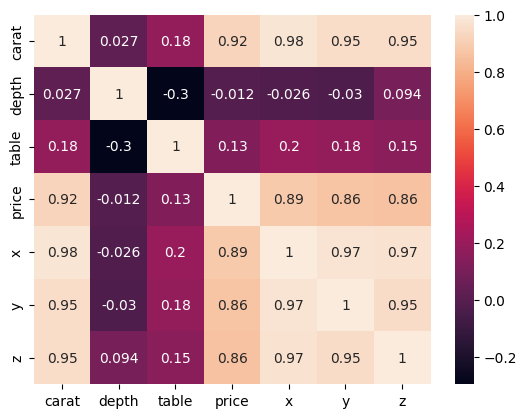

In [5]:
sns.heatmap(data=correlacao, annot=True);

In [6]:
df.cut.value_counts()

Ideal        19608
Premium      12507
Very Good    10922
Good          4443
Fair          1460
Name: cut, dtype: int64

In [7]:
df.clarity.value_counts()

SI1     11832
VS2     11125
SI2      8307
VS1      7449
VVS2     4635
VVS1     3321
IF       1613
I1        658
Name: clarity, dtype: int64

In [24]:
df.price.describe()

count    48940.000000
mean      3934.409644
std       3989.333861
min        326.000000
25%        949.000000
50%       2401.000000
75%       5331.250000
max      18823.000000
Name: price, dtype: float64

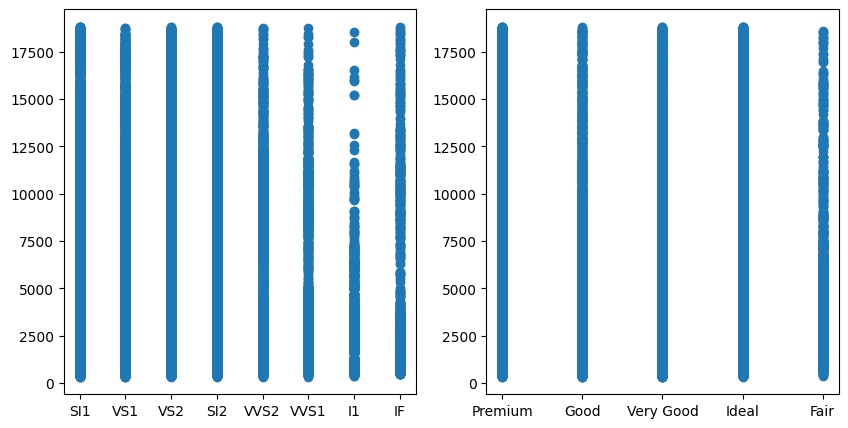

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(data=df, x='clarity', y='price')
ax[1].scatter(data=df, x='cut', y='price')

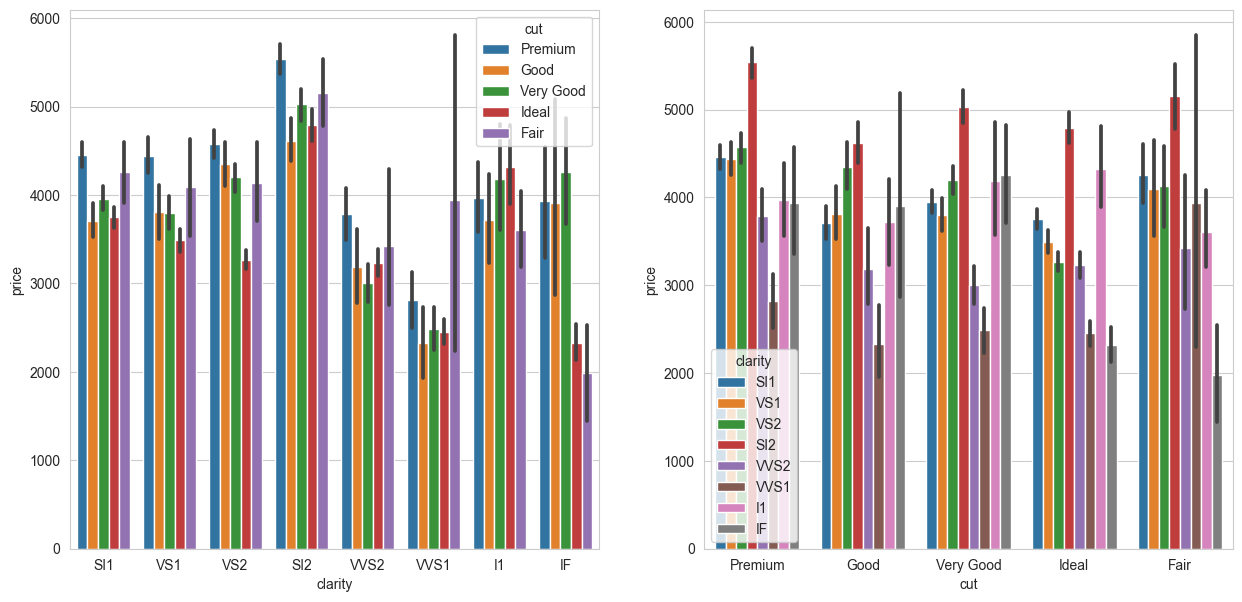

In [9]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.barplot(data=df, x='clarity', y='price', hue='cut', ax=axs[0])
sns.barplot(data=df, x='cut', y='price', hue='clarity', ax=axs[1])
plt.show();

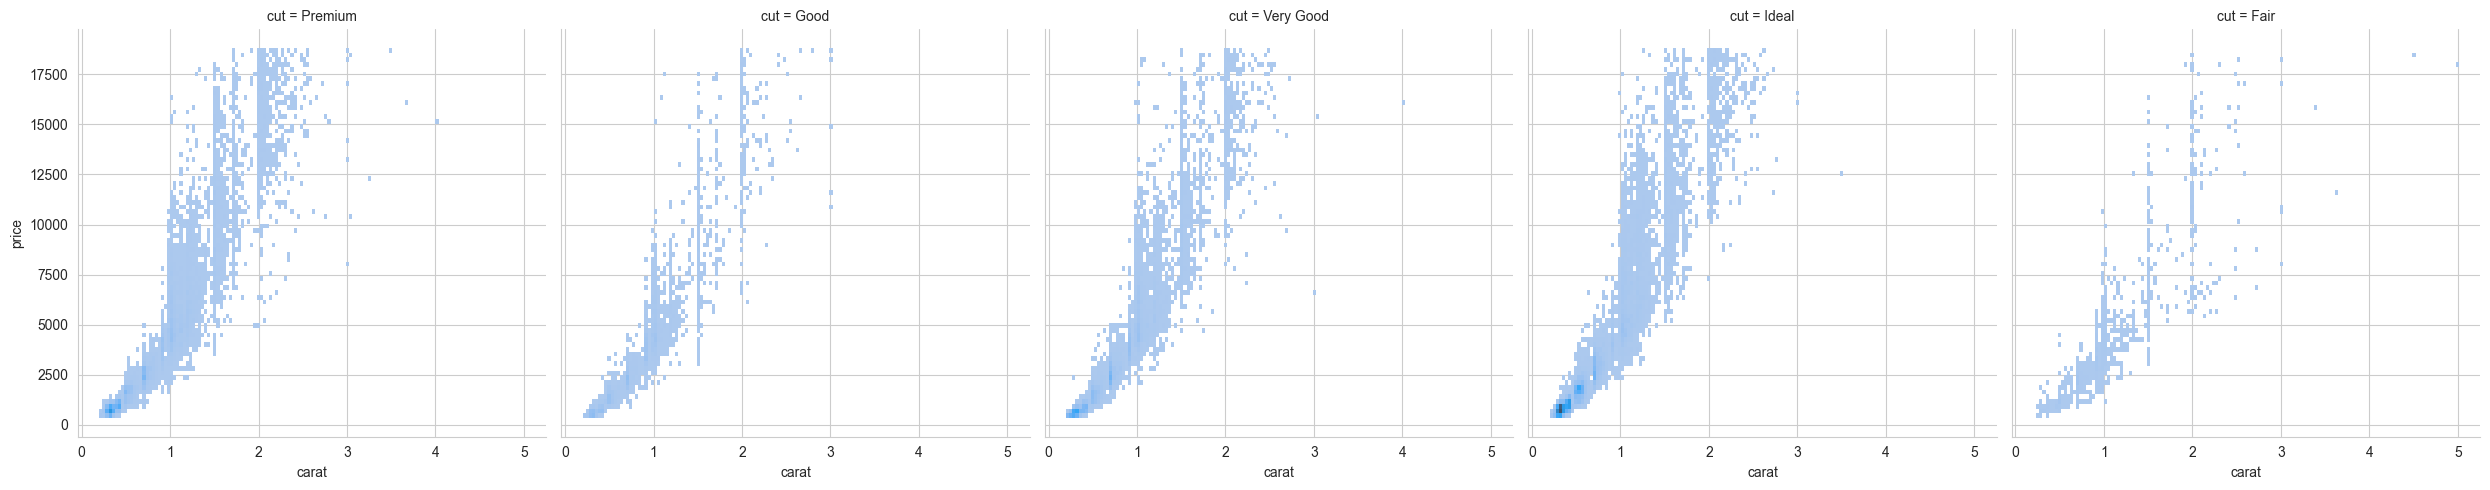

In [10]:
sns.set_style('whitegrid')
sns.displot(data=df, x='carat', y='price', col='cut');

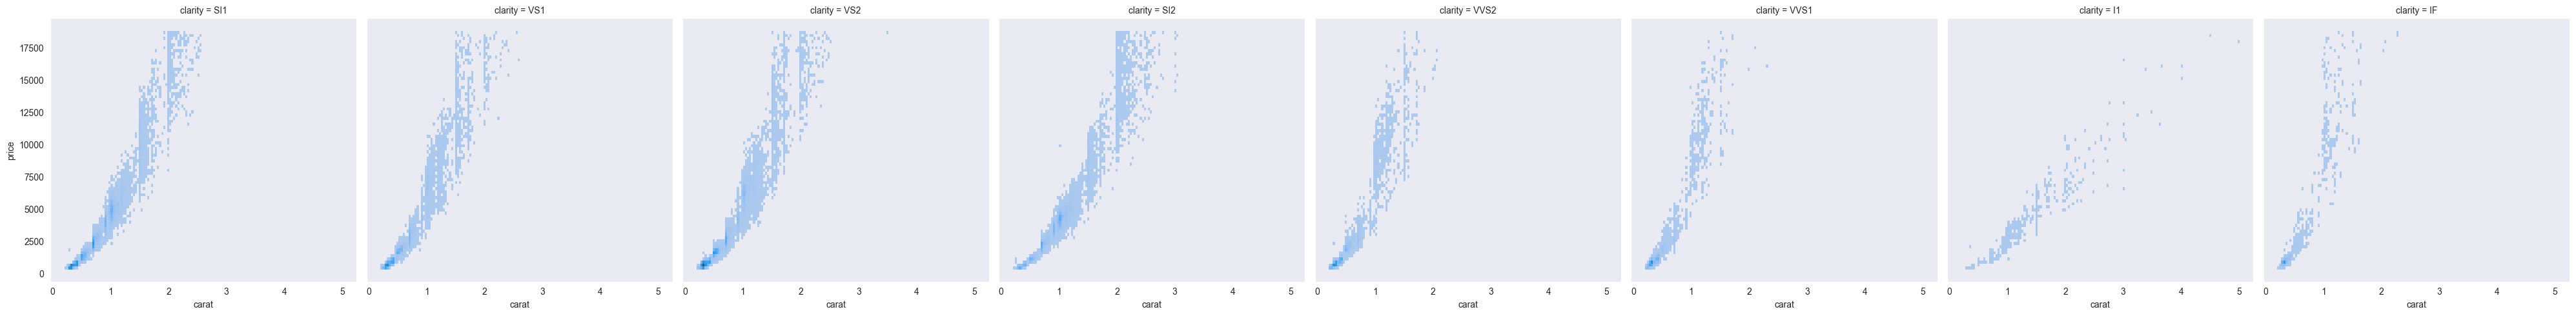

In [11]:
sns.set_style('dark')
sns.displot(data=df, x='carat', y='price', col='clarity');

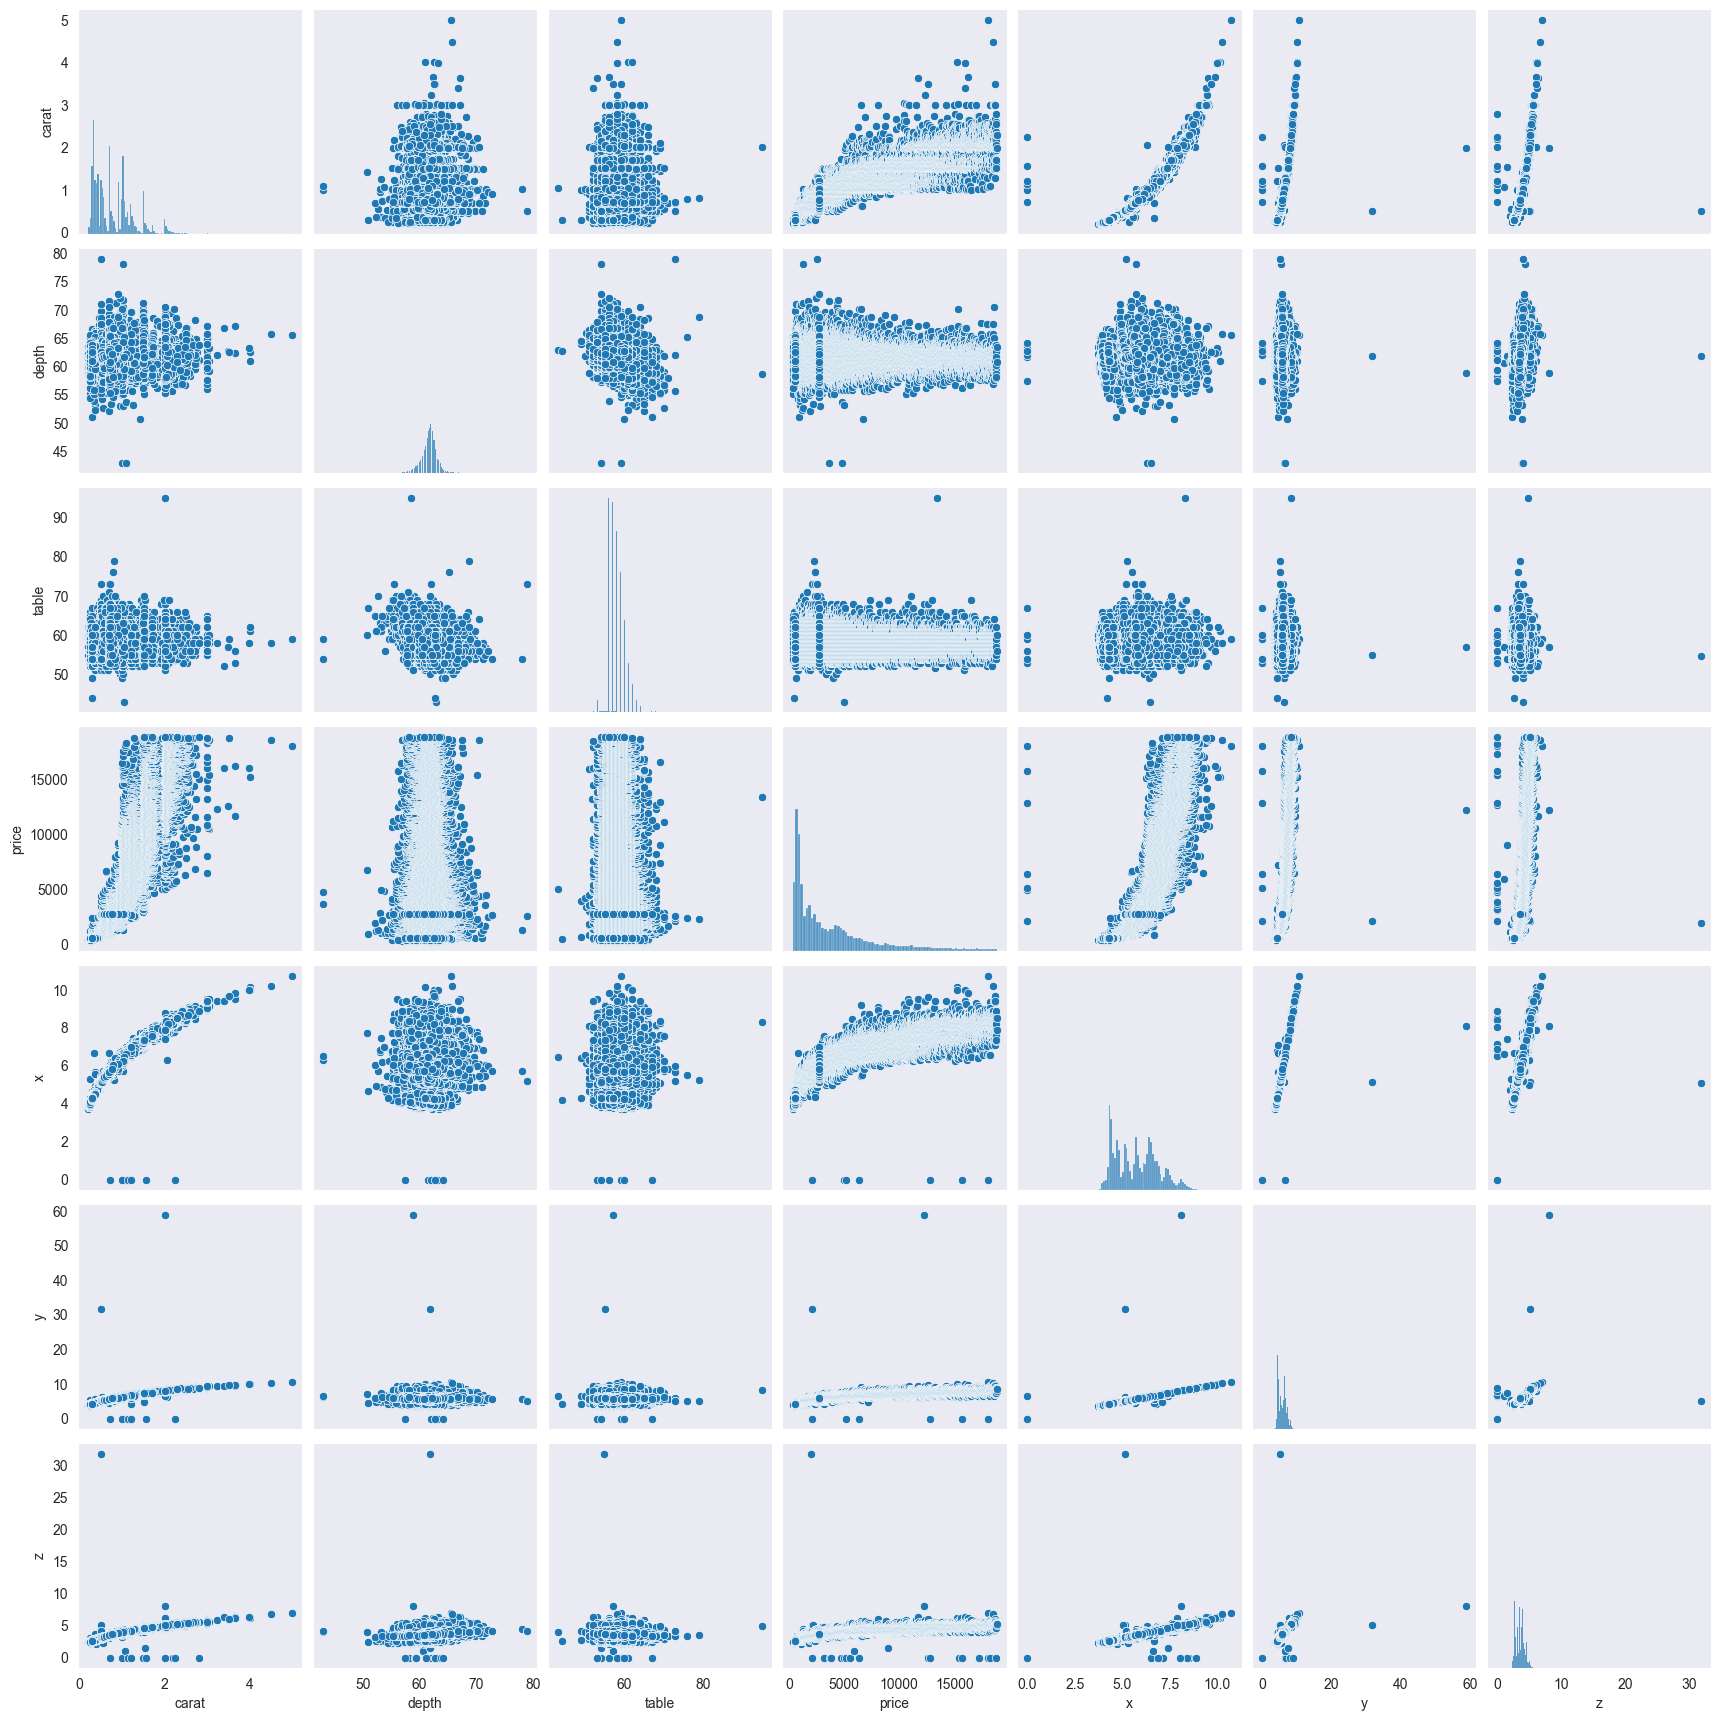

In [12]:
sns.pairplot(df)

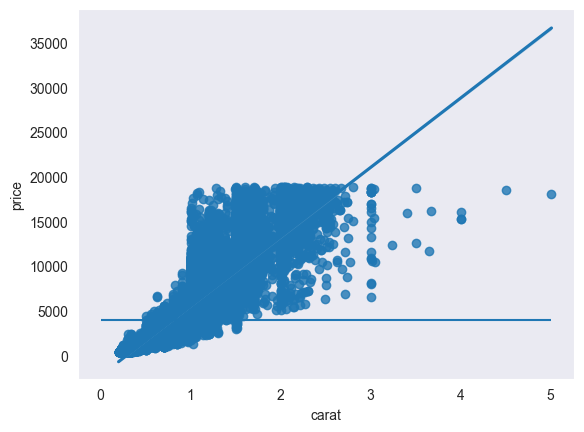

In [13]:
sns.regplot(data=df, x='carat', y='price')
plt.hlines(df.price.mean(), 0, 5)

<Axes: ylabel='price'>

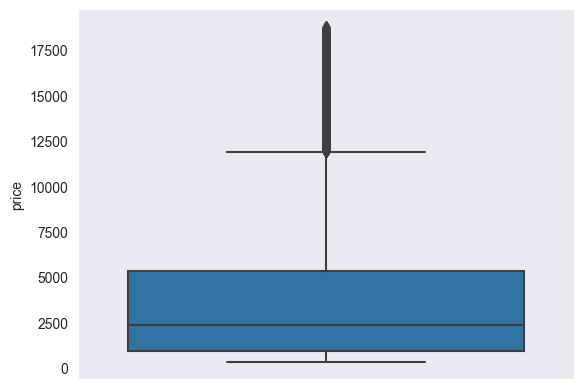

In [14]:
sns.boxplot(data=df, y=df.price)

<Axes: ylabel='carat'>

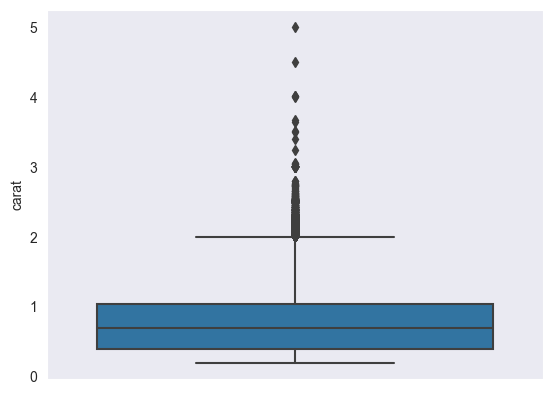

In [15]:
sns.boxplot(data=df, y=df.carat)

In [16]:
# TRANSFORMANDO AS VARIÁVEIS COM PALAVRAS EM NÚMEROS
df_dummies = pd.get_dummies(df)

In [17]:
df_dummies.head(1)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# PRIMEIRO MODELO DE REGRESSÃO LINEAR

Tentativa com: feature=carat / valor=price

In [18]:
#CRIANDO MODELO
model = LinearRegression()
X = df_dummies[['carat']]
y = df_dummies['price']
model.fit(X,y)
print(f'Coeficiente angular: {model.coef_}')
print(f'coeficiente linear: {model.intercept_}')

Coeficiente angular: [7759.35277644]
coeficiente linear: -2256.131693074192


In [19]:
#MÉTODO MAIS DEMORADO
y_observed = df_dummies.price
y_predicted = model.predict(X)
mean_squared_error(y_observed, y_predicted)
print(np.sqrt(mean_squared_error(y_observed, y_predicted)))
print(r2_score(y_observed, y_predicted))

1542.8464716474
0.8504268875149481


In [20]:
#MÉTODO MAIS RÁPIDO
print(np.sqrt(mean_squared_error(y, model.predict(X))))
print(model.score(X, y))

1542.8464716474
0.8504268875149481


# SEGUNDO MODELO DE REGRESSÃO LINEAR

Tentativa com: feature = carat, cut_Ideal / valor = price

In [21]:
scaler = StandardScaler()
X = df_dummies[['carat', 'cut_Ideal']]
y = df_dummies['price']
scaler.fit(X)
X_std = scaler.transform(X)
model = LinearRegression()
model.fit(X_std, y)
print(f'Coeficiente angular: {model.coef_}')
print(f'coeficiente linear: {model.intercept_}')
print(np.sqrt(mean_squared_error(y, model.predict(X_std))))
print(model.score(X_std, y))

Coeficiente angular: [3715.12812746  220.22992549]
coeficiente linear: 3934.409644462606
1527.4778784901384
0.8533918996734955


# TERCEIRO MODELO

Tentativa com: feature = carat, cut_Ideal, x / valor = price

In [27]:
scaler = StandardScaler()
X = df_dummies[['carat', 'cut_Ideal', 'x']]
y = df_dummies['price']
scaler.fit(X)
X_std = scaler.transform(X)
model = LinearRegression()
model.fit(X_std, y)
print(f'Coeficiente angular: {model.coef_}')
print(f'Coeficiente linar: {model.intercept_}')
print(np.sqrt(mean_squared_error(y, model.predict(X_std))))
print(model.score(X_std, y))

Coeficiente angular: [ 4830.87594348   216.56958371 -1144.79634404]
Coeficiente linar: 3934.4096444626052
1506.2806359540682
0.8574327101820011


# QUARTO MODELO

Tentativa com BOXCOX + feature = carat, cut_Ideal, x / valor = price

In [28]:
from scipy.stats import boxcox

In [35]:
scaler = StandardScaler()
X = df_dummies[['carat', 'cut_Ideal', 'x']]
y = df_dummies['price']
scaler.fit(X)
X_std = scaler.transform(X)
model = LinearRegression()

y_boxcox, lambda_boxcox = boxcox(y)
model.fit(X_std, y_boxcox)
y_pred_boxcox = model.predict(X_std)
y_pred = np.power((y_pred_boxcox * lambda_boxcox) + 1, 1 / lambda_boxcox)
print(np.sqrt(mean_squared_error(y, y_pred)))
print(model.score(X_std, y_boxcox))

1879.8629414592842
0.9214154824424801


# QUINTO MODELO

Tentativa com feature = carat_log, cut_Fair, x / valor = price_log (base logarítmica)

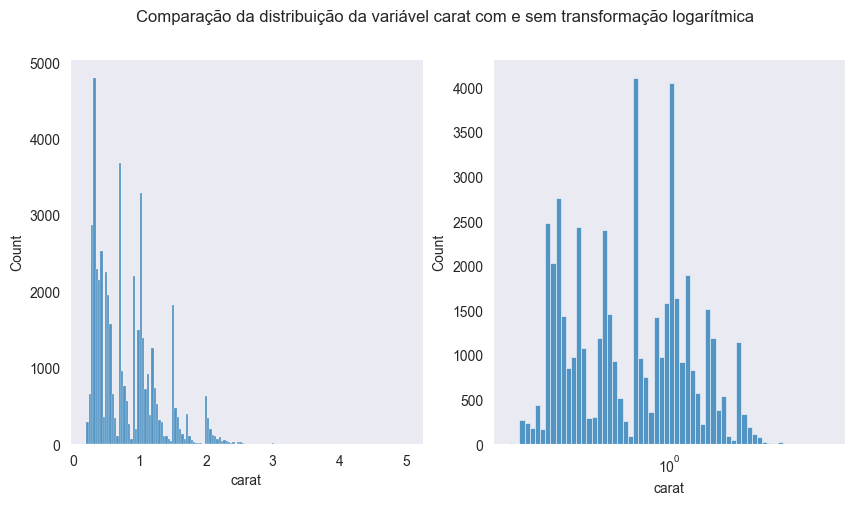

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=df, x='carat', ax=ax[0], edgecolor=None)
sns.histplot(data=df, x='carat', ax=ax[1], log_scale=10, edgecolor=None)
fig.suptitle('Comparação da distribuição da variável carat com e sem transformação logarítmica');

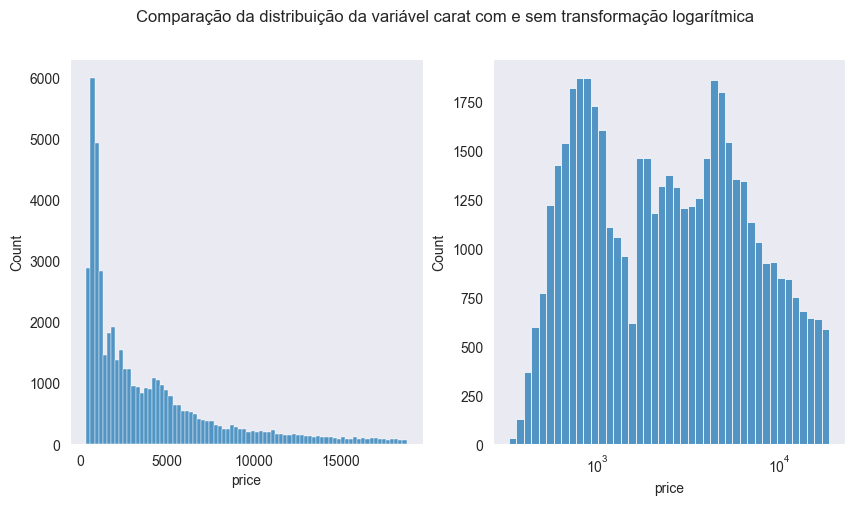

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=df, x='price', ax=ax[0], edgecolor=None)
sns.histplot(data=df, x='price', ax=ax[1], log_scale=10, edgecolor=None)
fig.suptitle('Comparação da distribuição da variável carat com e sem transformação logarítmica');

In [55]:
df_dummies['carat_log'] = np.log(df_dummies.carat)
df_dummies['price_log'] = np.log(df_dummies.price)
scaler = StandardScaler()
X = df_dummies[['carat_log', 'cut_Fair', 'x']]
y = df_dummies['price_log']
scaler.fit(X)
X_std = scaler.transform(X)
model = LinearRegression()
model.fit(X_std, y)

print(f'Coeficiente angular: {model.coef_}')
print(f'Coeficiente linar: {model.intercept_}')
print(np.sqrt(mean_squared_error(df_dummies.price, np.exp(model.predict(X_std)))))
print(model.score(X_std, y))

Coeficiente angular: [ 0.94495106 -0.04300824  0.0398317 ]
Coeficiente linar: 7.787206124968811
1621.3875408869062
0.9351412669577209


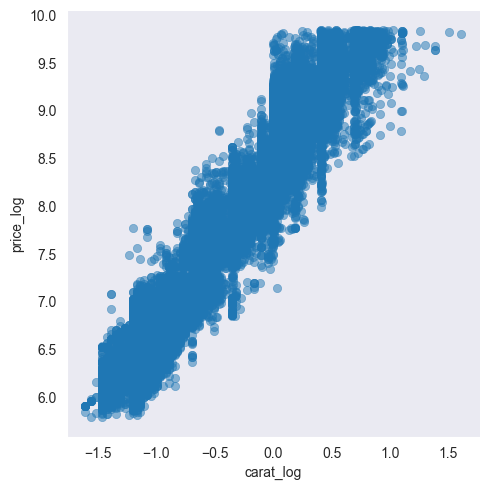

In [52]:
sns.relplot(data=df_dummies, y='price_log', x='carat_log', edgecolor=None, alpha=0.5);

# SEXTO MODELO

Tentando com valores: carat_log, clarity_values, color_value, cut_values / valor: price_log

In [61]:
df.color.value_counts(normalize=True).cumsum()

G    0.210196
E    0.391418
F    0.568226
H    0.722333
D    0.848202
I    0.948100
J    1.000000
Name: color, dtype: float64

In [66]:
# Criando colunas color_values com um valor númerico representando cada opção de cor
color_values = {'D':6, 'E':5, 'F':4, 'G':3, 'H':2, 'I':1, 'J':0}
df['color_value'] = df.color.map(lambda x: color_values[x])

In [68]:
df.clarity.value_counts(normalize=True).cumsum()

SI1     0.241765
VS2     0.469085
SI2     0.638823
VS1     0.791030
VVS2    0.885738
VVS1    0.953596
IF      0.986555
I1      1.000000
Name: clarity, dtype: float64

In [71]:
# Criando colunas com clarity_values com um valor númerico representando cada opção de pureza
clarity_values = {'IF':10, 'VVS1':9, 'VVS2':8, 'VS1':7, 'VS2':6, 'SI1':5, 'SI2':4, 'SI3':3, 'I1':2, 'I2':1, 'I3':0,}
df['clarity_values'] = df.clarity.map(lambda x: clarity_values[x])

In [80]:
# criando colunas com tipo de corte com um valor número representando cada opção de tipo de corte da coluna
cut_values = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Ideal': 4, 'Premium': 5}
df['cut_values'] = df.cut.map(lambda x: cut_values[x])

In [72]:
df['carat_log'] = np.log(df.carat)
df['price_log'] = np.log(df.price)

In [82]:
X = df[['carat_log', 'clarity_values', 'color_value', 'cut_values']]
y = df['price_log']
model = LinearRegression()
model.fit(X, y)
print(np.sqrt(mean_squared_error(df.price, np.exp(model.predict(X)))))

923.5466651224847


# SETIMO MODELO

    Usando FOR para criar um modelo com variações de CORES e valores de 'CARAT' para cada tipo de CLARITY (pureza).
    obs.: CARAT e PRICE na base logarítmica

In [122]:
model_results = dict()
for clarity in df.clarity.unique():
    X = df.loc[df.clarity==clarity, ['color_value', 'carat_log']].copy()
    y = df.loc[df.clarity==clarity, ['price_log']].copy()
    
    model = LinearRegression()
    model.fit(X, y)
    
    df.loc[df.clarity==clarity, 'price_predicted'] = np.exp(model.predict(X))
    
    model_results[clarity] = model

In [123]:
np.sqrt(mean_squared_error(df.price, df.price_predicted))

781.5050203271616

In [124]:
r2_score(df.price, df.price_predicted)

0.9616229443230886

In [125]:
model_results

{'SI1': LinearRegression(),
 'VS1': LinearRegression(),
 'VS2': LinearRegression(),
 'SI2': LinearRegression(),
 'VVS2': LinearRegression(),
 'VVS1': LinearRegression(),
 'I1': LinearRegression(),
 'IF': LinearRegression()}

In [88]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z,color_value,clarity_values,carat_log,price_log,cut_values,price_predicted
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5,5,-1.560648,5.786897,5,271.542185


# APLICANDO MODELO A TABELA SEM PREÇO

In [106]:
df_test = pd.read_csv('Ricks list of diamonds - Estimate prices.csv')

In [107]:
df_test['color_value'] = df_test.color.map(lambda x: color_values[x])
df_test['carat_log'] = np.log(df_test.carat)

In [112]:
df_test.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,color_value,carat_log
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2,-0.094311
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4,-0.967584


In [113]:
df_test.clarity.unique()

array(['SI2', 'VS2', 'VS1', 'SI1', 'IF', 'VVS2', 'I1', 'VVS1'],
      dtype=object)

In [126]:
for clarity in df_test.clarity.unique():
    X = df_test.loc[df_test.clarity==clarity, ['color_value', 'carat_log']].copy()
    model = model_results[clarity]
    df_test.loc[df_test.clarity==clarity, 'price_predicted'] = np.exp(model.predict(X))

In [127]:
df_test.price_predicted.describe()

count     5000.000000
mean      3863.804606
std       3887.779891
min        269.438622
25%        973.450465
50%       2467.147460
75%       5206.080334
max      25959.741976
Name: price_predicted, dtype: float64

In [128]:
df_test.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,color_value,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2,-0.094311,2999.022845
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4,-0.967584,899.421153
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,2,-0.653926,1356.115512
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3,0.095310,6595.778829
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,3,0.824175,17055.062103
5,2.01,Very Good,J,VS2,60.8,58.0,8.08,8.16,4.94,0,0.698135,14373.546898
6,1.06,Ideal,G,SI2,62.2,57.0,6.51,6.49,4.04,3,0.058269,4164.895175
7,0.70,Premium,E,SI1,60.1,58.0,5.81,5.83,3.50,5,-0.356675,2544.116541
8,0.73,Premium,I,VS2,59.7,59.0,5.94,5.81,3.51,1,-0.314711,2345.418352
9,0.73,Ideal,H,IF,61.6,55.0,5.80,5.82,3.58,2,-0.314711,3600.530363
